### Imports and options

First, let's import the tools we need. Remember why we need to import our tools? If not, ask Dr. Gerken

In [2]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

### The Data 

The data we are going to use today is from the [CERES](https://climatedataguide.ucar.edu/climate-data/ceres-ebaf-clouds-and-earths-radiant-energy-systems-ceres-energy-balanced-and-filled) (Clouds and the Earth's Radiant Energy System) mission. We are going to use the EBAF-TOA and the EBAF-Surface data products (both freely available [on this webpage](https://ceres.larc.nasa.gov/data/)) as climatologies (i.e. monthly averages 2005-2015). 

The data quality summary of these data (PDF) can be found [here](https://ceres.larc.nasa.gov/documents/DQ_summaries/CERES_EBAF_Ed4.1_DQS.pdf), and more accessible publications can be found [here for TOA](https://journals.ametsoc.org/doi/pdf/10.1175/JCLI-D-17-0208.1) and [here for Surface](https://journals.ametsoc.org/doi/pdf/10.1175/JCLI-D-17-0523.1).

We will also be using an example of [ERA5 Reanalysis](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5) data.

ERA5 (or European ReAnalysis v5) provides global, hourly estimates of atmospheric, ocean wave, and land-surface variables at a horizontal resolution of 31\,km. Data is available from 1940 onwards both hourly and averaged to monthly. 

Reanalysis in general are the fusion of observations with a global weather model to derive a homogenous, regular-best estimate output on a grid from station based observations. 

ERA5 is produced by the [European Center for Medium Range Weather Forecasting (ECMWF)](https://www.ecmwf.int/) and can be downloaded freely (account registration required).

I have placed the data files into the `W6_Gridded_Reanalysis/data` directory. 

### Read the data

Most of today's meteorological data is stored in the NetCDF format (``*.nc``). NetCDF files are binary files, which means that you can't just open them in a text editor. You need a special reader for it. Nearly all the programming languages offer an interface to NetCDF. For this course we are going to use the [xarray](http://xarray.pydata.org/en/stable/) library to read the data: 

Let's start with having a look at the ERA5 file, I am providing: 



In [3]:
# Here I downloaded the file in the "data" folder which I placed in a folder close to this notebook
# The variable name "ds" stands for "dataset"
ds = xr.open_dataset(r'../data/reanalysis-era5-single-level-monthly-means_2000_T_Td_u_v_SST_P.nc', engine='netcdf4')

In [4]:
# Lets see what we have:
ds

<xarray.Dataset> Size: 199MB
Dimensions:    (longitude: 1440, latitude: 721, time: 12)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 96B 2000-01-01 2000-02-01 ... 2000-12-01
Data variables:
    u10        (time, latitude, longitude) float32 50MB ...
    v10        (time, latitude, longitude) float32 50MB ...
    t2m        (time, latitude, longitude) float32 50MB ...
    sst        (time, latitude, longitude) float32 50MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-27 06:22:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Each netcdf file has a data model, that is represented by xarray: 

![xarray data model](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

The NetCDF dataset is made up of various elements: Dimensions, Coordinates, Variables, Attributes:

- the dimensions specify the number of elements of each data coordinate, their names should be understandable and specific
- the attributes provide some information about the file (metadata)
- the variables contain the actual data. In our file there are five variables. All have the dimensions [time, latitude, longitude], so we can expect an array of size [12, 721, 1440]
- the coordinates locate the data in space and time



### Coordinates 

Let's have a look at the **time** coordinate first:

(You can see that this is a similar notation to _pandas_)

In [5]:
ds['time']

<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['2000-01-01T00:00:00.000000000', '2000-02-01T00:00:00.000000000',
       '2000-03-01T00:00:00.000000000', '2000-04-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-06-01T00:00:00.000000000',
       '2000-07-01T00:00:00.000000000', '2000-08-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2000-10-01T00:00:00.000000000',
       '2000-11-01T00:00:00.000000000', '2000-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 96B 2000-01-01 2000-02-01 ... 2000-12-01
Attributes:
    long_name:  time

The array contains numbers 12 datetimes, they represent the months of the year. If we were to look into the ERA5 documentation, we know that these represent the average for each month during 2002.

The **location coordinates** are also self-explaining:

In [6]:
ds.longitude  # This is an alternate notaion to ds['longitude] that works in pandas and xarray as long as there are not spaces

<xarray.DataArray 'longitude' (longitude: 1440)> Size: 6kB
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    units:      degrees_east
    long_name:  longitude

In [7]:
ds.latitude

<xarray.DataArray 'latitude' (latitude: 721)> Size: 3kB
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

**Q: what is the spatial resolution of the ERA5 data?**

### Variables 


Variables can also be accessed directly from the dataset:

In [8]:
ds.sst

<xarray.DataArray 'sst' (time: 12, latitude: 721, longitude: 1440)> Size: 50MB
[12458880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 96B 2000-01-01 2000-02-01 ... 2000-12-01
Attributes:
    units:      K
    long_name:  Sea surface temperature

The **attributes** of a variable are extremely important, they carry the metadata and must be specified by the data provider. Here we can read in which units the variable is defined, as well as a description of the variable (the "long_name" attribute).


**Q: what other information can we read from this printout? Explore the other data variables and see if you understand all of them.** *Note: you can expand each variable's attributes in the html display, or use the method `ds.info()` to list all vars and attributes.*

In [11]:
# your answer here

## First Plots

Let't create a first set of plots. For example, we can quickly produce a map of SST in June. 

To do so, we have to select data based on the time coordinate using the `.sel()` method. The resulting slice is a 2-D grid with latitude and longitude. 

In [27]:
sst_jun= ds.sst.sel(time="2000-06-01")
sst_jun

<xarray.DataArray 'sst' (latitude: 721, longitude: 1440)> Size: 4MB
array([[271.4604, 271.4604, 271.4604, ..., 271.4604, 271.4604, 271.4604],
       [271.4604, 271.4604, 271.4604, ..., 271.4604, 271.4604, 271.4604],
       [271.4604, 271.4604, 271.4604, ..., 271.4604, 271.4604, 271.4604],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 8B 2000-06-01
Attributes:
    units:      K
    long_name:  Sea surface temperature

We can now make a plot:

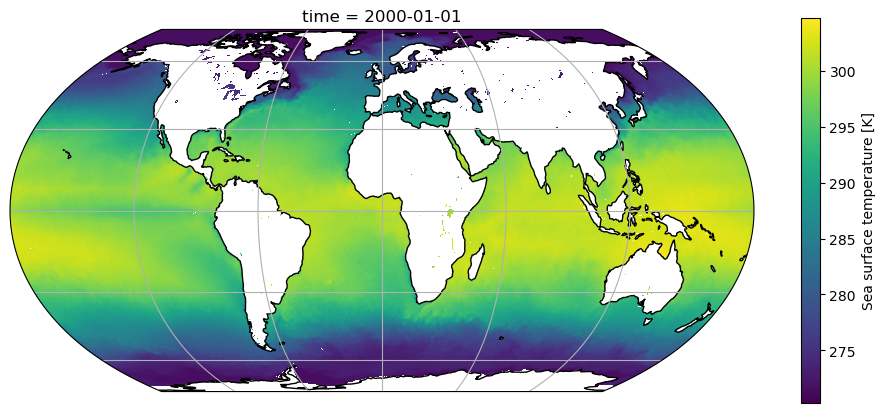

In [45]:
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sst_jan onto ax
sst_jan.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

## Simple Analysis 

Analysing climate data is extremely easy in Python thanks to the [xarray](http://xarray.pydata.org/en/stable/) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/) libraries. First we are going to compute the time average of the SST over the year:

Similar to _pandas_ we can perform computations over our data, like taking the average [`.mean()`]. We just have need to specify the dimension (`'time'`, `'latitude'`, `'longitude'`).

In [29]:
sst_avg = ds.sst.mean(dim='time')

What is `sst_avg` by the way?

In [ ]:
ssst_avg

So `ssst_avg` is a 2-dimensional array of dimensions [latitude, longitude] (note that the time dimension has disapeared).

When we applied the `.mean()` function, we added an argument (called a **keyword argument**): ``dim='time'``. With this argument, we told the function to compute the average *over the time dimension*.

Let's make another plot of this. Give it a try.

In [46]:
# Plot the mean sst 


In [47]:
# Try what happens if you don't specify the dimension for your averaging. 


**Q: What do you think happened?**



*Note: scalar output is quite verbose in xarray... Your can print just the data onto the screen with the  .values attribute:*

In [48]:
ds.sst.mean().values

array(286.79526, dtype=float32)

**Q: what should we expect from the folowing commands:**

    ds.sst.mean(dim='longitude')
    ds.sst.mean(dim='time').mean(dim='longitude')
    ds.sst.mean(dim=['time', 'longitude'])
    
**Try them out!**

In [49]:
# Try the commands above. Do they work as expected? 


**E: what is the maximum SST value? And the minimum?** ([hint](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.min.html))

In [39]:
# your answer here

## Slicing Data 

In [60]:
sst_Australia = ds.sst.sel(time='2000-06-01',longitude = slice(105,160),latitude =slice(-8,-45))
sst_Australia

<xarray.DataArray 'sst' (latitude: 149, longitude: 221)> Size: 132kB
array([[301.85385, 301.91742, 301.9204 , ..., 302.18314, 302.65158, 302.73373],
       [301.6889 , 301.7327 , 301.75906, ...,       nan,       nan, 302.48004],
       [301.52756, 301.56174, 301.57852, ..., 302.36008, 302.43024, 302.522  ],
       ...,
       [283.31595, 283.30035, 283.25238, ..., 285.33548, 285.22632, 285.07758],
       [283.08923, 283.139  , 283.2134 , ..., 285.07877, 285.01517, 284.906  ],
       [282.77795, 282.9897 , 283.06406, ..., 284.79147, 284.82745, 284.84305]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 884B 105.0 105.2 105.5 ... 159.5 159.8 160.0
  * latitude   (latitude) float32 596B -8.0 -8.25 -8.5 ... -44.5 -44.75 -45.0
    time       datetime64[ns] 8B 2000-06-01
Attributes:
    units:      K
    long_name:  Sea surface temperature

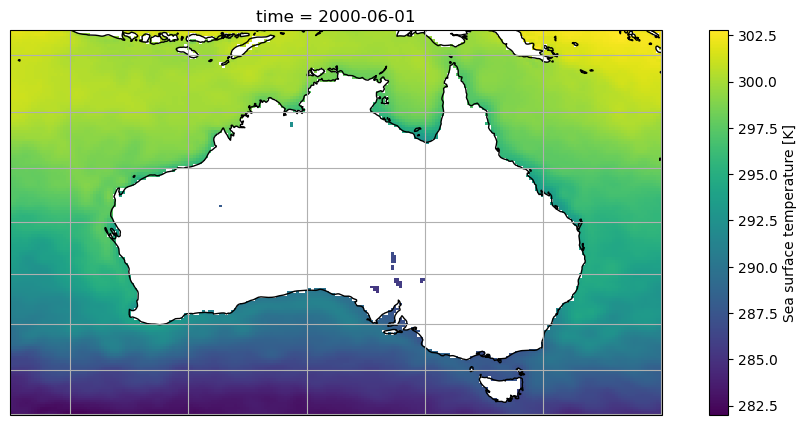

In [62]:
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.LambertCylindrical())  #
# ax is an empty plot. We now plot the variable sst_jan onto ax
sst_Australia.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot